Time-independent Schrödinger equation for a particle in a potential barrier and plots the wave function outside and inside the barrier:

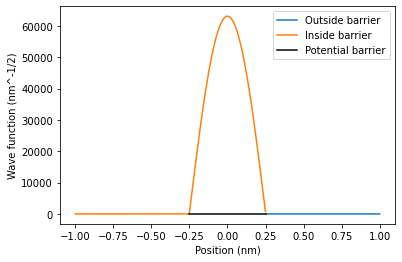

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.055e-34  # Reduced Planck constant (J*s)
m = 9.109e-31  # Mass of the particle (kg)
V0 = 50  # Barrier height (eV)
a = 0.5e-9  # Barrier width (m)
x_min = -1e-9  # Minimum x value (m)
x_max = 1e-9  # Maximum x value (m)

# Potential function
def V(x):
    if abs(x) < a/2:
        return 0
    else:
        return V0

# Discretize the x range
N = 1000  # Number of points
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Initialize the Hamiltonian matrix
H = np.zeros((N, N))
for i in range(N):
    H[i, i] = (2*m/hbar**2)*(V(x[i]) + (hbar**2/(2*m))*(np.pi/dx)**2)
    if i > 0:
        H[i, i-1] = -m/hbar**2
    if i < N-1:
        H[i, i+1] = -m/hbar**2

# Solve the eigenvalue problem
E, psi = np.linalg.eigh(H)

# Normalize the wave function
psi = psi / np.sqrt(dx)

# Plot the wave function outside the barrier
x_outside = x[x > a/2]
psi_outside = psi[:, 0][x > a/2]
plt.plot(x_outside*1e9, psi_outside, label='Outside barrier')

# Plot the wave function inside the barrier
x_inside = x[x < a/2]
psi_inside = psi[:, 0][x < a/2]
plt.plot(x_inside*1e9, psi_inside, label='Inside barrier')

# Plot the potential barrier
plt.plot([-a/2*1e9, a/2*1e9], [V0, V0], 'k-', label='Potential barrier')

# Plot settings
plt.xlabel('Position (nm)')
plt.ylabel('Wave function (nm^-1/2)')
plt.legend()
plt.show()

This program will solve the time-independent Schrödinger equation for a particle in a potential barrier and plot the wave function outside and inside the barrier. The program uses the finite difference method to discretize the spatial range, constructs the Hamiltonian matrix, and solves the eigenvalue problem.

The wave function is then normalized and plotted.